In [1]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# mpl.rcParams['figure.figsize'] = (10,8)

In [2]:
df = pd.read_csv(r'car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Target column is Selling_Price

# df.nunique()  # To Check Number of Unique columns in each column of DataFrame

In [5]:
# Checking Categorical Columns
cat_col = []
for i in df.columns:
    col = i
    if len(df[col].unique()) < 6:
        cat_col.append(i)
print(cat_col)   

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [6]:
# col= 'Car_Name'
# len(df[col].unique())

In [7]:
# Checking Unique Values present in Specific Categorical Columns
for i in df.columns:
    col = i
    if len(df[col].unique()) < 6:
#         cat_col.append(i)
        print(f'{i} : ',df[col].unique())

Fuel_Type :  ['Petrol' 'Diesel' 'CNG']
Seller_Type :  ['Dealer' 'Individual']
Transmission :  ['Manual' 'Automatic']
Owner :  [0 1 3]


In [8]:
# Check Missing  or null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# Convert Year into Number of Year by subtracting year from year current year
import datetime
now = datetime.datetime.now()
# df.insert(10,'Years_Old',np.abs(df.Year - now.year))
df['Years_Old'] = np.abs(df.Year - now.year)

In [10]:
df.drop(columns=['Year'],inplace=True)

In [11]:
# we droping Car_name because it no need to included for model building
df.drop(columns=['Car_Name'],inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Encoding

In [13]:
df = pd.get_dummies(df,drop_first=True) # we use get_dummies method (one hot encoded) for encoding of object_categorical columns

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Analyzing

In [15]:
import seaborn as sns

In [16]:
# sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [17]:
# sns.pairplot(df.corr())

In [18]:
col1 = df.Selling_Price
col2 = [df.Years_Old, df.Present_Price, df.Kms_Driven, df.Owner,
       df.Fuel_Type_Diesel, df.Fuel_Type_Petrol, df.Seller_Type_Individual,
       df.Transmission_Manual]
col_name = ['Years_Old', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual']
corr_col=[col1.corr(col2[i]) for i in range(0,len(col2))]
            
corr_df = pd.DataFrame({'Column_Name':col_name,'Correlation with Selling_Price':corr_col})

corr_df.sort_values(by='Correlation with Selling_Price',ascending=False)

,Column_Name,Correlation with Selling_Price
1,Present_Price,0.878983
4,Fuel_Type_Diesel,0.552339
2,Kms_Driven,0.029187
3,Owner,-0.088344
0,Years_Old,-0.236141
7,Transmission_Manual,-0.367128
5,Fuel_Type_Petrol,-0.540571
6,Seller_Type_Individual,-0.550724


### Checking Feature Importance

In [19]:
# Before splitting the df Lets check the feature importance of columns for target column Selling
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()

In [20]:
etr.fit(df.drop(columns=['Selling_Price']),df.Selling_Price)

ExtraTreesRegressor()

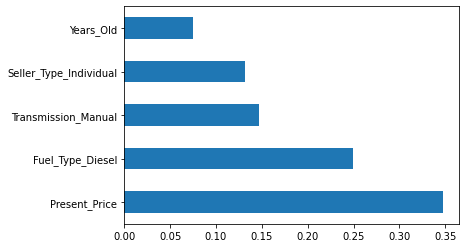

In [21]:
# Plot Graph for feature importance for better visualization

feature_import = pd.Series(etr.feature_importances_,index=df.drop(columns=['Selling_Price']).columns)

feature_import.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
print(etr.feature_importances_)

[0.34781991 0.04062061 0.0004544  0.07536471 0.24978846 0.00698222
 0.13160009 0.14736959]


In [23]:
feature_importance = pd.DataFrame({'Feature':df.drop(columns=['Selling_Price']).columns, 'Importance':etr.feature_importances_})
feature_importance.sort_values(by='Importance',ascending=False)

,Feature,Importance
0,Present_Price,0.347820
4,Fuel_Type_Diesel,0.249788
7,Transmission_Manual,0.147370
6,Seller_Type_Individual,0.131600
3,Years_Old,0.075365
1,Kms_Driven,0.040621
5,Fuel_Type_Petrol,0.006982
2,Owner,0.000454


## Sampling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train,test = train_test_split(df,test_size = 0.2)

In [26]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

## Training And Prediction

### Using Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor()
# rfr.fit(train_x,train_y)

In [29]:
## HyperParameters

# Number of Ltrees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num=12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of Levels in tree
max_depths = [int(x) for x in np.linspace(5,30,num = 6)]
# max_depth.append(None)

# Miniimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf =[1,2,5,10]


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth':max_depths,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)    


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr = RandomForestRegressor()

In [33]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2 , random_state=42, n_jobs = 1)

In [34]:
rfr_random.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
prediction = rfr_random.predict(test_x)

C:\Users\prita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

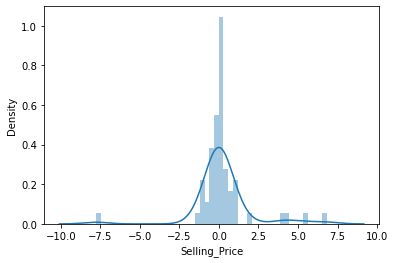

In [36]:
sns.distplot(test_y - prediction)

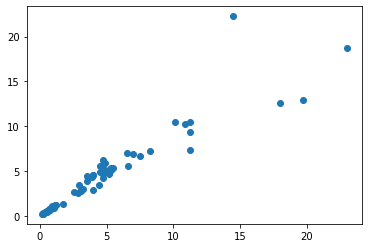

In [37]:
plt.scatter(test_y,prediction)

## Pickle

In [38]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rfr_random, file)